## Zomato data Analysis Project

## Step-1 Importing Libraries

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from matplotlib import colormaps

In [2]:
os.getcwd()

'C:\\Users\\aditaya\\Downloads'

## Step-2 Create the DataFrame

In [3]:
df = pd.read_csv("Zomato.csv")

In [4]:
df.shape

(148, 7)

In [5]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [6]:
df.isna().values.any()

np.False_

In [7]:
df.duplicated().values.sum()

np.int64(0)

## Convert the data type of column - rate

In [8]:
def HandleRate(value):
    value=str(value).split("/")
    value=value[0]
    return float(value)

In [9]:
df.rate=df["rate"].apply(HandleRate)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


## Type of Restaurant

In [11]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 0, 'Type of Restaurants')

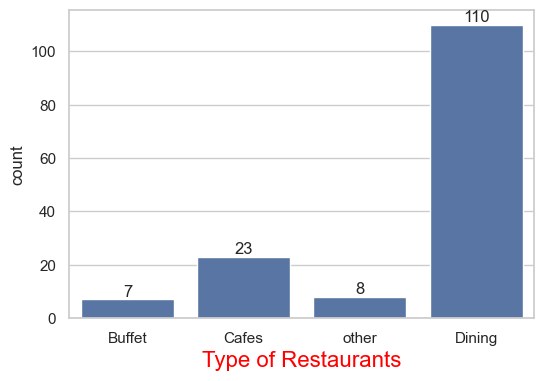

In [12]:
sns.set(rc={"figure.figsize":(6,4)})
sns.set(style="whitegrid")
ax=sns.countplot(df,x="listed_in(type)")
for bars in ax.containers:
    ax.bar_label(bars)
plt.xlabel("Type of Restaurants", c="red", fontsize=16)

* Conculsion - Majority of the restaurants falls in dining Category

In [13]:
grouped_data = df.groupby("listed_in(type)", as_index=False)["votes"].sum()
grouped_data

,listed_in(type),votes
0,Buffet,3028
1,Cafes,6434
2,Dining,20363
3,other,9367


Text(0, 0.5, 'Votes')

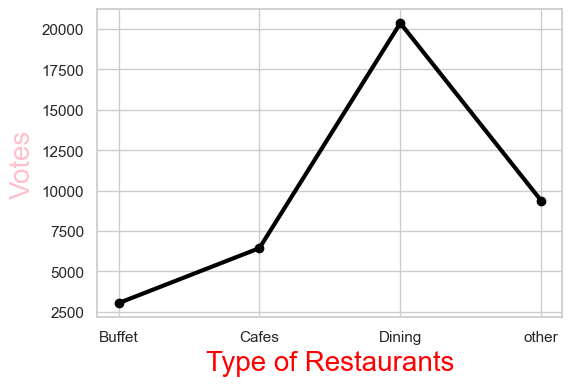

In [14]:
plt.plot(grouped_data["listed_in(type)"], grouped_data["votes"], c="black", linewidth=3, marker="o")
plt.xlabel("Type of Restaurants", c="red", fontsize=20)
plt.ylabel("Votes", c="pink", fontsize=20)


* Conculsion - Dining Restaurants has received Maximum Votes

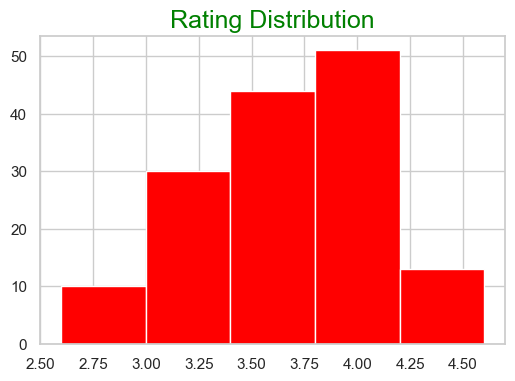

In [25]:
plt.hist(x=df["rate"], bins=5, color="red")
plt.title("Rating Distribution", fontsize=18, c="green")
plt.show()

* Conculsion- The majority Restaurants Recieved ratings from 3.5 to 4

## Average Order spending by couples

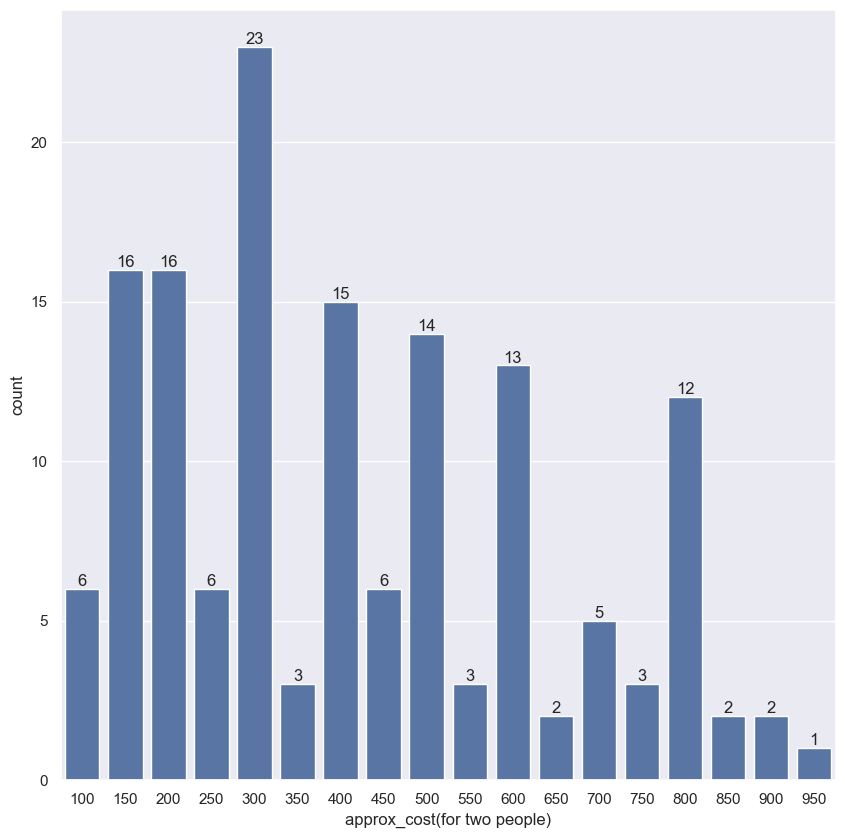

In [49]:
sns.set(rc={"figure.figsize":(10,10)})
ax=sns.countplot(data=df, x="approx_cost(for two people)")
for bars in ax.containers:
    ax.bar_label(bars)

* Conculsion - The majority of couples ordered food of approx 300 Rs. So the restaurants have to designed their menu keeping this this thing in mind.

## Which Mode Recieve Maximum rating

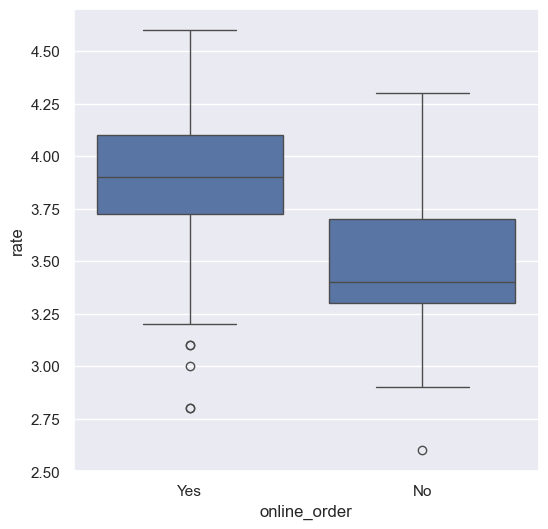

In [54]:
plt.figure(figsize=(6,6))
ax=sns.boxplot(data=df,x="online_order", y="rate")

* Conculsion - From Conculsion its pretty clear thats its a Online mode Which recives a maximum ratings

In [61]:
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viri

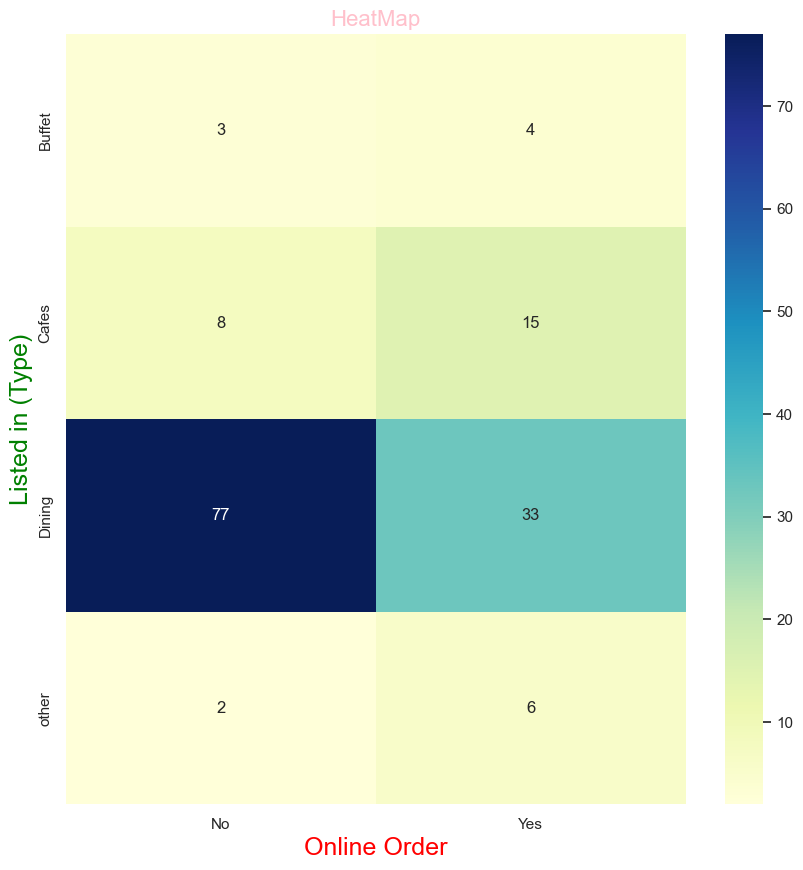

In [64]:
pivot_table = pd.pivot_table(data=df, index="listed_in(type)", columns="online_order", aggfunc="size", fill_value=0)
pivot_table
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt="d")
plt.xlabel("Online Order", fontsize=18, color="red")
plt.ylabel("Listed in (Type)", fontsize=18, color="green")
plt.title("HeatMap", color ="pink", fontsize=16)
plt.show()

* Conculsion - Dining Restaurants primarily accepts offline orders, whereas cafes primarily recieves online orders. This suggests
*that clients prefers orders in person at restaurants, but prefer online ordering at cafes.